In [43]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.colors import ListedColormap, rgb2hex
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from sklearn.metrics import recall_score, accuracy_score, precision_score, fbeta_score, f1_score
from scipy.stats import ttest_ind
!pip install xlrd
from scipy.stats import shapiro, kstest, anderson
from scipy.stats import ttest_rel, ttest_1samp

In [44]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [45]:
#Load the dataset
df = pd.read_excel('/Users/linaabril/Documents/FE 2024/scoring/Scoring-20240917/defaut2000.xls')

In [46]:
df.head()

,yd,tdta,reta,opita,ebita,lsls,lta,gempl,invsls,nwcta,cacl,qacl,fata,ltdta,mveltd
0,0,0.145539,0.383244,0.249250,0.240580,2.832563,3.196006,0.105342,0.075232,0.793606,6.452848,6.093447,0.000000,27.604182,0.027201
1,0,0.157739,0.653575,0.261918,0.215381,5.350979,5.149535,-0.002974,0.016330,0.384159,3.529916,3.398378,-99.990000,8.962069,0.237790
2,0,0.182360,0.218102,-0.053062,-0.356679,4.031815,3.970206,-0.257328,0.042915,0.437357,3.433004,3.179101,0.002600,3.644061,0.366079
3,0,0.196958,0.011139,0.221797,0.200671,4.025514,3.827649,0.205517,0.158391,0.595541,4.319132,3.243222,0.001032,27.631832,0.162987
4,0,0.202570,0.483833,0.280728,0.233083,2.443132,2.238314,-0.032192,0.237983,0.585332,6.133335,3.571832,0.051713,8.326772,0.293362


In [47]:
# Replace the observations at -99.9 by missing values
df.replace(-99.99, np.nan, inplace=True)

In [48]:
# Sort the data by 'lsls' column
df = df.sort_values(by='lsls')

In [49]:
# New column alternating between 1 and 0
df['Group'] = [1 if i % 2 == 0 else 0 for i in range(len(df))]

In [50]:
# Separate into estimation and validation samples
estimation_sample = df[df['Group'] == 1] 
validation_sample = df[df['Group'] == 0] 

In [51]:
# Display the first few rows
print(estimation_sample.head())
print(validation_sample.head())

     yd      tdta      reta     opita     ebita      lsls       lta     gempl  \
168   1  0.900077  0.015787 -0.010493 -0.052850  2.192304  2.344659 -0.023749   
4     0  0.202570  0.483833  0.280728  0.233083  2.443132  2.238314 -0.032192   
0     0  0.145539  0.383244  0.249250  0.240580  2.832563  3.196006  0.105342   
137   1  0.602458  0.144219 -0.332079 -0.356910  2.900271  1.703244 -0.082549   
73    0  0.599189  0.148823  0.143413  0.103324  2.963405  2.493213 -0.020852   

       invsls     nwcta      cacl      qacl      fata      ltdta    mveltd  \
168  0.836659 -0.018964  0.977743  0.134561  0.040913   0.371591  0.166923   
4    0.237983  0.585332  6.133335  3.571832  0.051713   8.326772  0.293362   
0    0.075232  0.793606  6.452848  6.093447  0.000000  27.604182  0.027201   
137  0.140173  0.436418  1.897833  0.943241  0.116378   0.647507  0.067219   
73   0.252448  0.516704  3.772515  1.604781  0.373210   0.500182  0.273783   

     Group  
168      1  
4        1  
0    

In [52]:
# Calculate univariate statistics for the 15 variables
stats_summary = df.describe()
print(stats_summary)

               yd        tdta        reta       opita       ebita        lsls  \
count  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000   
mean     0.475138    0.558917    0.250587    0.109429    0.066021    5.728610   
std      0.500767    0.222044    0.280174    0.120079    0.125711    1.638786   
min      0.000000    0.108258   -0.958997   -0.399538   -0.482151    2.192304   
25%      0.000000    0.430762    0.138137    0.059856    0.021517    4.466424   
50%      0.000000    0.541322    0.287026    0.116025    0.080512    5.697096   
75%      1.000000    0.643554    0.422355    0.184437    0.137487    6.782118   
max      1.000000    1.512991    0.835250    0.382154    0.310211   11.378750   

              lta       gempl      invsls       nwcta        cacl        qacl  \
count  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000   
mean     5.364688   -0.000717    0.173613    0.270786    2.219196    1.261482   
std      1.668283    0.1068

In [65]:
# Obtain univariate statistics
univariate_stats = estimation_sample.describe()

# Print the table of univariate statistics
print(univariate_stats)

              yd       tdta       reta      opita      ebita       lsls  \
count  91.000000  91.000000  91.000000  91.000000  91.000000  91.000000   
mean    0.450549   0.549266   0.265352   0.123561   0.077118   5.740984   
std     0.500305   0.220739   0.291161   0.114780   0.120935   1.692289   
min     0.000000   0.145539  -0.958997  -0.332079  -0.356910   2.192304   
25%     0.000000   0.419193   0.146521   0.069035   0.028152   4.453581   
50%     0.000000   0.543347   0.298553   0.140878   0.088694   5.697096   
75%     1.000000   0.658134   0.442470   0.195726   0.153684   6.783353   
max     1.000000   1.512991   0.710306   0.382154   0.284486  11.378750   

             lta      gempl     invsls      nwcta       cacl       qacl  \
count  91.000000  91.000000  91.000000  91.000000  91.000000  91.000000   
mean    5.356968  -0.000118   0.171294   0.275178   2.257697   1.303645   
std     1.678276   0.104123   0.105911   0.175885   1.057573   0.896721   
min     1.703244  -0.287

In [68]:
# Example univariate statistics for the estimation sample
variable_name = 'lsls'

# Calculate statistics for the estimation sample
mean_lsls = estimation_sample[variable_name].mean()
std_lsls = estimation_sample[variable_name].std()
min_lsls = estimation_sample[variable_name].min()
max_lsls = estimation_sample[variable_name].max()
median_lsls = estimation_sample[variable_name].median()

# Display the results
print(f"Variable: {variable_name}")
print(f"- Mean: {mean_lsls}")
print(f"- Standard deviation: {std_lsls}")
print(f"- Minimum value: {min_lsls}")
print(f"- Median: {median_lsls}")
print(f"- Maximum value: {max_lsls}")

# Interpretation of results
print("Commentary:")
if mean_lsls > median_lsls:
    print(f"The mean of {variable_name} is greater than the median, suggesting a positive skew.")
elif mean_lsls < median_lsls:
    print(f"The mean of {variable_name} is less than the median, suggesting a negative skew.")
else:
    print(f"The mean and median of {variable_name} are equal, suggesting a symmetric distribution.")

print(f"The standard deviation of {variable_name} is {std_lsls}, indicating the variability relative to its mean. "
      f"The minimum value is {min_lsls} and the maximum value is {max_lsls}, which shows the range of {variable_name}.")

Variable: lsls
- Mean: 5.740984056043955
- Standard deviation: 1.6922891156261572
- Minimum value: 2.1923039
- Median: 5.6970962
- Maximum value: 11.37875
Commentary:
The mean of lsls is greater than the median, suggesting a positive skew.
The standard deviation of lsls is 1.6922891156261572, indicating the variability relative to its mean. The minimum value is 2.1923039 and the maximum value is 11.37875, which shows the range of lsls.


**Separate Healthy and Default Firms in Both Datasets**

*Estimation sample:*

In [69]:
# Firms in default within estimation_sample
default_firms_estimation = estimation_sample[estimation_sample['yd'] == 1]

# Healthy firms within estimation_sample
healthy_firms_estimation = estimation_sample[estimation_sample['yd'] == 0]

# Display sample rows from each group
print("Default Firms in Estimation Sample:")
print(default_firms_estimation.head())

print("\nHealthy Firms in Estimation Sample:")
print(healthy_firms_estimation.head())

Default Firms in Estimation Sample:
     yd      tdta      reta     opita     ebita      lsls       lta     gempl  \
168   1  0.900077  0.015787 -0.010493 -0.052850  2.192304  2.344659 -0.023749   
137   1  0.602458  0.144219 -0.332079 -0.356910  2.900271  1.703244 -0.082549   
99    1  0.297779  0.609529  0.060537  0.022705  3.028867  3.588643  0.011956   
129   1  0.543347  0.435182  0.079582  0.070670  3.367881  3.987544 -0.116231   
169   1  0.902526 -0.510671 -0.002009 -0.070582  3.478208  3.688528 -0.038601   

       invsls     nwcta      cacl      qacl      fata     ltdta    mveltd  \
168  0.836659 -0.018964  0.977743  0.134561  0.040913  0.371591  0.166923   
137  0.140173  0.436418  1.897833  0.943241  0.116378  0.647507  0.067219   
99   0.052192  0.271273  3.131584  2.897276  0.107307  3.659994  0.220958   
129  0.256044  0.396291  1.740112  1.482788  0.007900  0.683592  0.057729   
169  0.244546 -0.429493  0.478824  0.238361  0.057801  0.831794  0.526616   

     Group  
1

*validation sample:*

In [70]:
# Firms in default within validation_sample
default_firms_validation = validation_sample[validation_sample['yd'] == 1]

# Healthy firms within validation_sample
healthy_firms_validation = validation_sample[validation_sample['yd'] == 0]

# Display sample rows from each group
print("Default Firms in Validation Sample:")
print(default_firms_validation.head())

print("\nHealthy Firms in Validation Sample:")
print(healthy_firms_validation.head())


Default Firms in Validation Sample:
     yd      tdta      reta     opita     ebita      lsls       lta     gempl  \
138   1  0.603715  0.185826 -0.118158 -0.170569  2.847273  2.770030 -0.169024   
123   1  0.517705  0.250614  0.004336 -0.027894  2.925547  2.127856 -0.063153   
178   1  1.194813 -0.687160  0.059045  0.021517  3.399509  3.175943 -0.042573   
96    1  0.213275  0.487536 -0.022950 -0.085864  3.501116  2.933322 -0.069260   
101   1  0.352488  0.421666  0.104132  0.089516  3.692987  3.872935 -0.083393   

       invsls     nwcta      cacl      qacl      fata     ltdta    mveltd  \
138  0.485257  0.418705  1.994468  0.749378  0.182681  0.672712  0.137957   
123  0.377140  0.438358  1.963775  0.122656  0.062870  0.433155  0.091776   
178  0.211297  0.243164  1.906422  0.921461  0.902017  0.257062  0.291130   
96   0.199540  0.485657  4.493063  1.960868  0.034623  2.640777  0.364131   
101  0.224503  0.714476  6.838081  5.305749  0.075171  2.831504  0.131277   

     Group  
1

*3.Histograms for healthy and default firms (estimation and validation sample)*

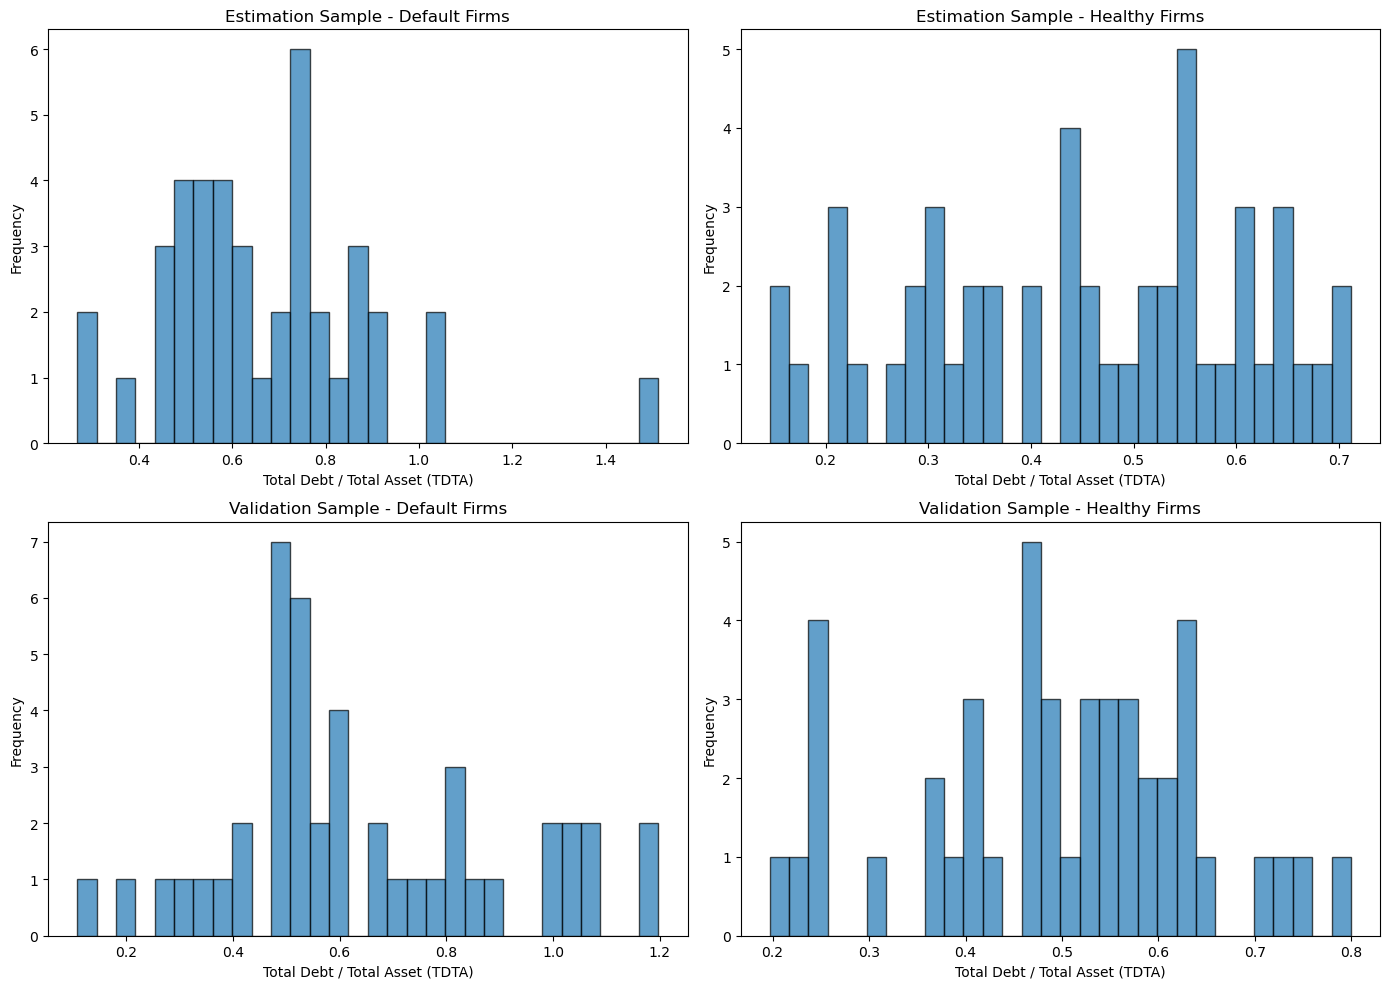

In [71]:
# Plotting histograms
plt.figure(figsize=(14, 10))

# Estimation Sample - Default Firms
plt.subplot(2, 2, 1)
plt.hist(default_firms_estimation['tdta'], bins=30, alpha=0.7, edgecolor='black')
plt.title("Estimation Sample - Default Firms")
plt.xlabel("Total Debt / Total Asset (TDTA)")
plt.ylabel("Frequency")

# Estimation Sample - Healthy Firms
plt.subplot(2, 2, 2)
plt.hist(healthy_firms_estimation['tdta'], bins=30, alpha=0.7, edgecolor='black')
plt.title("Estimation Sample - Healthy Firms")
plt.xlabel("Total Debt / Total Asset (TDTA)")
plt.ylabel("Frequency")

# Validation Sample - Default Firms
plt.subplot(2, 2, 3)
plt.hist(default_firms_validation['tdta'], bins=30, alpha=0.7, edgecolor='black')
plt.title("Validation Sample - Default Firms")
plt.xlabel("Total Debt / Total Asset (TDTA)")
plt.ylabel("Frequency")

# Validation Sample - Healthy Firms
plt.subplot(2, 2, 4)
plt.hist(healthy_firms_validation['tdta'], bins=30, alpha=0.7, edgecolor='black')
plt.title("Validation Sample - Healthy Firms")
plt.xlabel("Total Debt / Total Asset (TDTA)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

*4.normality tests for total debt/total assets for default versus healthy firms*

In [72]:
# Separate data for the estimation sample
# Default firms in estimation sample
default_firms_estimation = estimation_sample[estimation_sample['yd'] == 1]['tdta'].dropna()

# Healthy firms in estimation sample
healthy_firms_estimation = estimation_sample[estimation_sample['yd'] == 0]['tdta'].dropna()

# Shapiro-Wilk Test for estimation sample
shapiro_default = shapiro(default_firms_estimation)
shapiro_healthy = shapiro(healthy_firms_estimation)

# Kolmogorov-Smirnov Test for estimation sample
ks_default = kstest(default_firms_estimation, 'norm', args=(default_firms_estimation.mean(), default_firms_estimation.std()))
ks_healthy = kstest(healthy_firms_estimation, 'norm', args=(healthy_firms_estimation.mean(), healthy_firms_estimation.std()))

# Anderson-Darling Test for estimation sample (does not return p-value)
anderson_default = anderson(default_firms_estimation, dist='norm')
anderson_healthy = anderson(healthy_firms_estimation, dist='norm')

# Print results for the estimation sample
print("Normality Test Results for Total Debt / Total Assets (TDTA) in Estimation Sample:")

print("\nDefault Firms:")
print(f"- Shapiro-Wilk Test: p-value = {shapiro_default.pvalue:.4f}")
print(f"- Kolmogorov-Smirnov Test: p-value = {ks_default.pvalue:.4f}")
print(f"- Anderson-Darling Test: statistic = {anderson_default.statistic:.4f}")

print("\nHealthy Firms:")
print(f"- Shapiro-Wilk Test: p-value = {shapiro_healthy.pvalue:.4f}")
print(f"- Kolmogorov-Smirnov Test: p-value = {ks_healthy.pvalue:.4f}")
print(f"- Anderson-Darling Test: statistic = {anderson_healthy.statistic:.4f}")

Normality Test Results for Total Debt / Total Assets (TDTA) in Estimation Sample:

Default Firms:
- Shapiro-Wilk Test: p-value = 0.0071
- Kolmogorov-Smirnov Test: p-value = 0.6713
- Anderson-Darling Test: statistic = 0.6688

Healthy Firms:
- Shapiro-Wilk Test: p-value = 0.0860
- Kolmogorov-Smirnov Test: p-value = 0.6419
- Anderson-Darling Test: statistic = 0.5805


*5. test of equality of means of tdta*

*Student’s t-test of Equality of Means*

In [73]:
from scipy.stats import ttest_ind

# Separate TDTA data for default (yd=1) and healthy (yd=0) firms in the estimation sample
tdta_default = estimation_sample[estimation_sample['yd'] == 1]['tdta'].dropna()
tdta_healthy = estimation_sample[estimation_sample['yd'] == 0]['tdta'].dropna()

# Perform Student's t-test (Welch's t-test) for equality of means
t_stat, p_value = ttest_ind(tdta_default, tdta_healthy, equal_var=False)

print("Student’s t-test of Equality of Means:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


Student’s t-test of Equality of Means:
t-statistic: 5.384405778506313
p-value: 9.263448682920358e-07


*Analysis of Variance (ANOVA) with Student’s Test on Parameter β = 0*

In [74]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit an ANOVA model
model = smf.ols('tdta ~ C(yd)', data=estimation_sample).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print("\nANOVA Results with Student’s test on β = 0:")
print(anova_results)

# Coefficient significance test (Student's t-test for β = 0)
print("\nCoefficients of the Model:")
print(model.summary())



ANOVA Results with Student’s test on β = 0:
            sum_sq    df          F        PR(>F)
C(yd)     1.133279   1.0  31.014844  2.685246e-07
Residual  3.252052  89.0        NaN           NaN

Coefficients of the Model:
                            OLS Regression Results                            
Dep. Variable:                   tdta   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     31.01
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.69e-07
Time:                        23:24:59   Log-Likelihood:                 22.463
No. Observations:                  91   AIC:                            -40.93
Df Residuals:                      89   BIC:                            -35.90
Df Model:                           1                                         
Covariance Type:            nonrobust                             

*Linear Probability Model (LPM) with Student’s Test on Parameter β′ = 0*

In [75]:
# Fit a linear probability model (LPM) using OLS
lpm_model = smf.ols('yd ~ tdta', data=estimation_sample).fit()

print("\nLinear Probability Model (LPM) with Student’s test on β' = 0:")
print(lpm_model.summary())



Linear Probability Model (LPM) with Student’s test on β' = 0:
                            OLS Regression Results                            
Dep. Variable:                     yd   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     31.01
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.69e-07
Time:                        23:25:02   Log-Likelihood:                -51.996
No. Observations:                  91   AIC:                             108.0
Df Residuals:                      89   BIC:                             113.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

*Correlation Matrix Test for r(yd, tdta) = 0*

In [76]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value between yd and tdta
correlation, p_value_corr = pearsonr(estimation_sample['yd'], estimation_sample['tdta'])

print("\nCorrelation Matrix Test for r(yd, tdta) = 0:")
print(f"Correlation coefficient: {correlation}")
print(f"p-value: {p_value_corr}")


Correlation Matrix Test for r(yd, tdta) = 0:
Correlation coefficient: 0.508355258686486
p-value: 2.685245633582078e-07


In [77]:
# Separate TDTA data for default (yd=1) and healthy (yd=0) firms in the estimation sample
tdta_default_estimation = estimation_sample[estimation_sample['yd'] == 1]['tdta'].dropna()  # Default firms
tdta_healthy_estimation = estimation_sample[estimation_sample['yd'] == 0]['tdta'].dropna()  # Healthy firms

# 1. Independent Two-Sample t-Test (Equal Variance Assumed)
t_stat_equal_var, p_value_equal_var = ttest_ind(tdta_default_estimation, tdta_healthy_estimation, equal_var=True)
print("Independent Two-Sample t-Test (Equal Variance Assumed) in Estimation Sample:")
print(f"t-statistic: {t_stat_equal_var}")
print(f"p-value: {p_value_equal_var}\n")

# 2. Welch’s t-Test (Unequal Variance)
t_stat_unequal_var, p_value_unequal_var = ttest_ind(tdta_default_estimation, tdta_healthy_estimation, equal_var=False)
print("Welch’s t-Test (Unequal Variance) in Estimation Sample:")
print(f"t-statistic: {t_stat_unequal_var}")
print(f"p-value: {p_value_unequal_var}\n")

# 3. Paired t-Test (Hypothetical Paired Data)
# If paired data exists, use it; otherwise, simulate pairing by sampling equal lengths.
min_len = min(len(tdta_default_estimation), len(tdta_healthy_estimation))
paired_default = np.random.choice(tdta_default_estimation, min_len, replace=False)
paired_healthy = np.random.choice(tdta_healthy_estimation, min_len, replace=False)
t_stat_paired, p_value_paired = ttest_rel(paired_default, paired_healthy)
print("Paired t-Test (Simulated Pairing) in Estimation Sample:")
print(f"t-statistic: {t_stat_paired}")
print(f"p-value: {p_value_paired}\n")

# 4. One-Sample t-Test (Compare Each Group to a Benchmark)
benchmark_value = 0.5  # Replace with an appropriate benchmark if available

# Test default firms against the benchmark
t_stat_one_sample_default, p_value_one_sample_default = ttest_1samp(tdta_default_estimation, benchmark_value)
print("One-Sample t-Test (Default Firms vs Benchmark) in Estimation Sample:")
print(f"t-statistic: {t_stat_one_sample_default}")
print(f"p-value: {p_value_one_sample_default}\n")

# Test healthy firms against the benchmark
t_stat_one_sample_healthy, p_value_one_sample_healthy = ttest_1samp(tdta_healthy_estimation, benchmark_value)
print("One-Sample t-Test (Healthy Firms vs Benchmark) in Estimation Sample:")
print(f"t-statistic: {t_stat_one_sample_healthy}")
print(f"p-value: {p_value_one_sample_healthy}\n")

Independent Two-Sample t-Test (Equal Variance Assumed) in Estimation Sample:
t-statistic: 5.5690972757121315
p-value: 2.6852456335820627e-07

Welch’s t-Test (Unequal Variance) in Estimation Sample:
t-statistic: 5.384405778506313
p-value: 9.263448682920358e-07

Paired t-Test (Simulated Pairing) in Estimation Sample:
t-statistic: 4.824644531325714
p-value: 2.0668390960497838e-05

One-Sample t-Test (Default Firms vs Benchmark) in Estimation Sample:
t-statistic: 4.911514981058644
p-value: 1.569058016980141e-05

One-Sample t-Test (Healthy Firms vs Benchmark) in Estimation Sample:
t-statistic: -2.3122747282329312
p-value: 0.025005986254939234

